In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [2]:
df_treino = pd.read_csv("data/train.csv")
df_treino.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df_kaggle_submission = pd.read_csv('data/test.csv', sep=',')
df_kaggle_submission.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [4]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df_treino.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

## Adicionar cálculo do IMC ao dataframe

In [6]:
df_treino['IMC'] = df_treino['Weight']/(pow(df_treino['Height'],2))
df_kaggle_submission['IMC'] = df_kaggle_submission['Weight']/(pow(df_kaggle_submission['Height'],2))

In [7]:
def resumir_df(df):
    print(f'Formato do DataFrame:{df.shape}')
    df_resumo = pd.DataFrame(df.dtypes, columns=['Tipo'])
    df_resumo['Valores faltantes'] = df.isnull().sum().values
    df_resumo['Percentual de valores faltantes'] = (df.isnull().sum().values / len(df) * 100)
    df_resumo['Valores únicos'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    df_resumo['Min'] = desc['min'].values
    df_resumo['Máx'] = desc['max'].values
    return df_resumo.sort_values(by='Valores únicos', ascending=True)
resumir_df(df_treino)

Formato do DataFrame:(20758, 19)


,Tipo,Valores faltantes,Percentual de valores faltantes,Valores únicos,Min,Máx
Gender,object,0,0.0,2,NaN,NaN
SCC,object,0,0.0,2,NaN,NaN
SMOKE,object,0,0.0,2,NaN,NaN
family_history_with_overweight,object,0,0.0,2,NaN,NaN
FAVC,object,0,0.0,2,NaN,NaN
CALC,object,0,0.0,3,NaN,NaN
CAEC,object,0,0.0,4,NaN,NaN
MTRANS,object,0,0.0,5,NaN,NaN
NObeyesdad,object,0,0.0,7,NaN,NaN
NCP,float64,0,0.0,689,1.0,4.0


## Significado das siglas das variáveis
- FAVC: Frequência de consumo de comidas altamente calóricas
- CAEC: Frequência de pequenas refeições entre as refeições principais
- SMOKE: Variável binária que indica fumante ou não fumante
- SCC: Variável binária que indica monitoramento de calorias consumidas
- CALC: Variável binária que indica o consumo de álcool
- MTRANS: Meio de transporte mais utilizado
- NCP: Número de refeições por dia
- FCVC: Frequência de consumo de vegetais em refeições
- TUE: Tempo gasto em dispositivos tecnológicos 
- FAF: Frequência de atividade física
- CH2O: Quantidade (em litros) de consumo diário de água

## Análise de frequência das variáveis

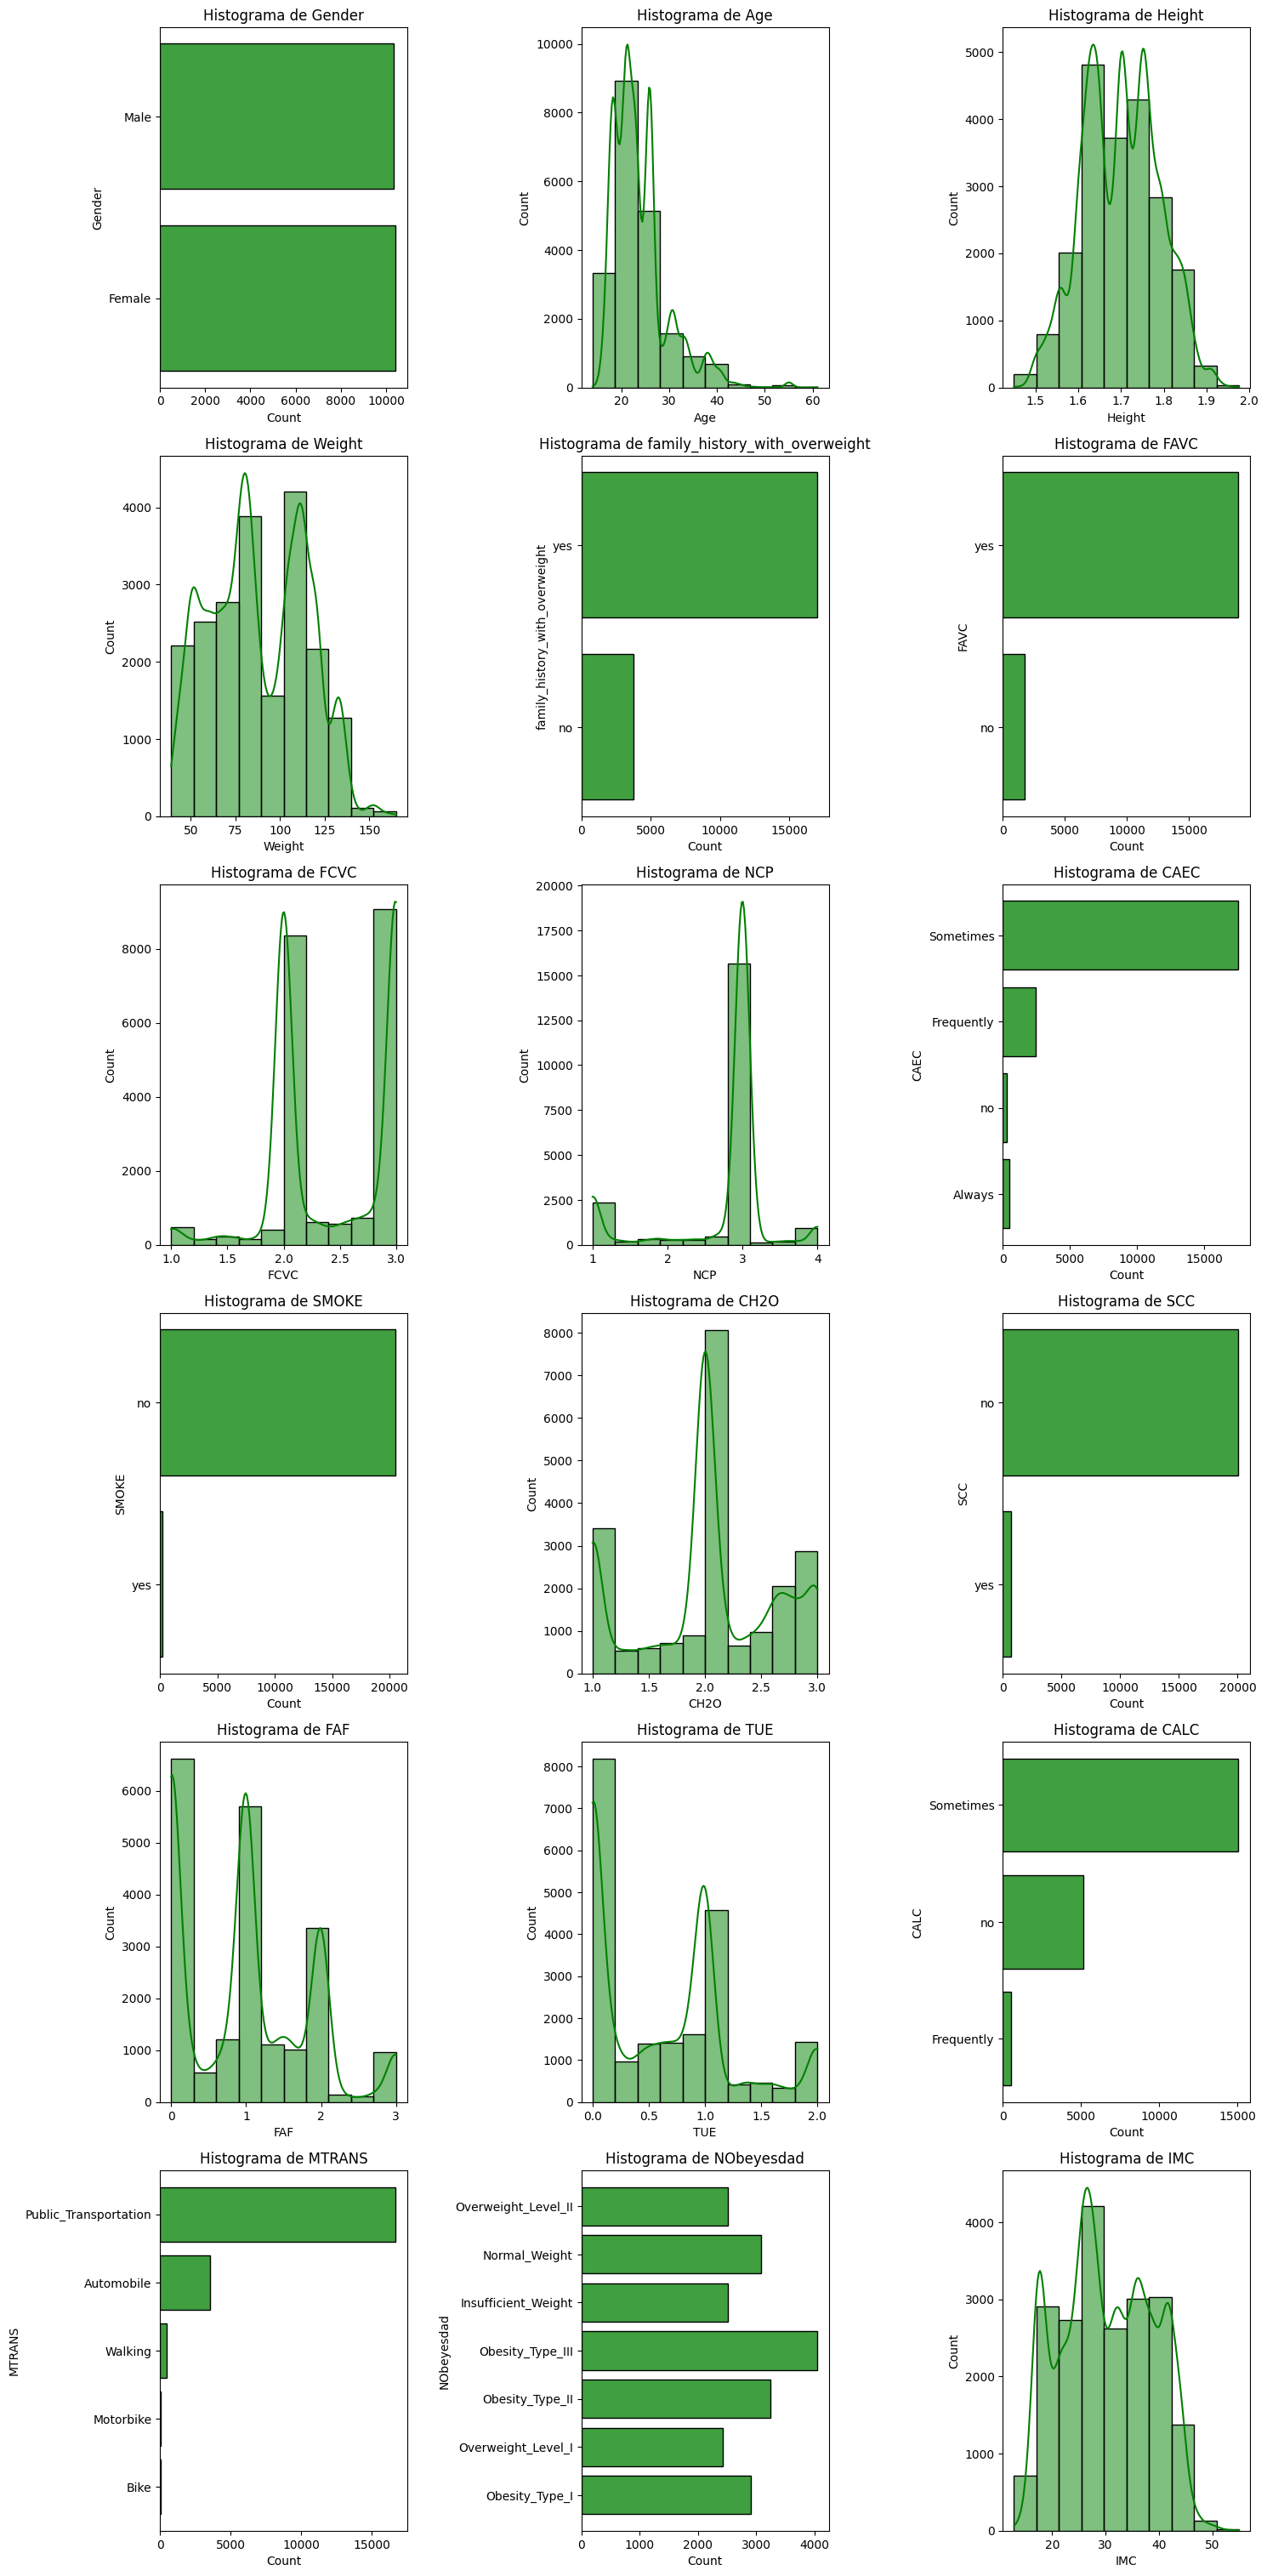

In [8]:
def plot_variables_frequency(df: pd.DataFrame):

    cols_to_plot = [col for col in df.columns if col not in ('id')]
    num_variables = len(df.columns)
    num_columns = 3
    num_rows = math.ceil(num_variables / num_columns)
    
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size accordingly

    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(num_rows, num_columns, i % num_columns + 1 + (i // num_columns) * num_columns)
        if df[col].dtype == 'object':
            sns.histplot(df, y=col, bins=10, color='green', legend=False, shrink=.8)
        else:
            sns.histplot(df, x=col, bins=10, color='green', kde=True)
        plt.title(f'Histograma de {col}')
        

    plt.tight_layout()
    plt.show()
plot_variables_frequency(df_treino)

## Análise multivariável

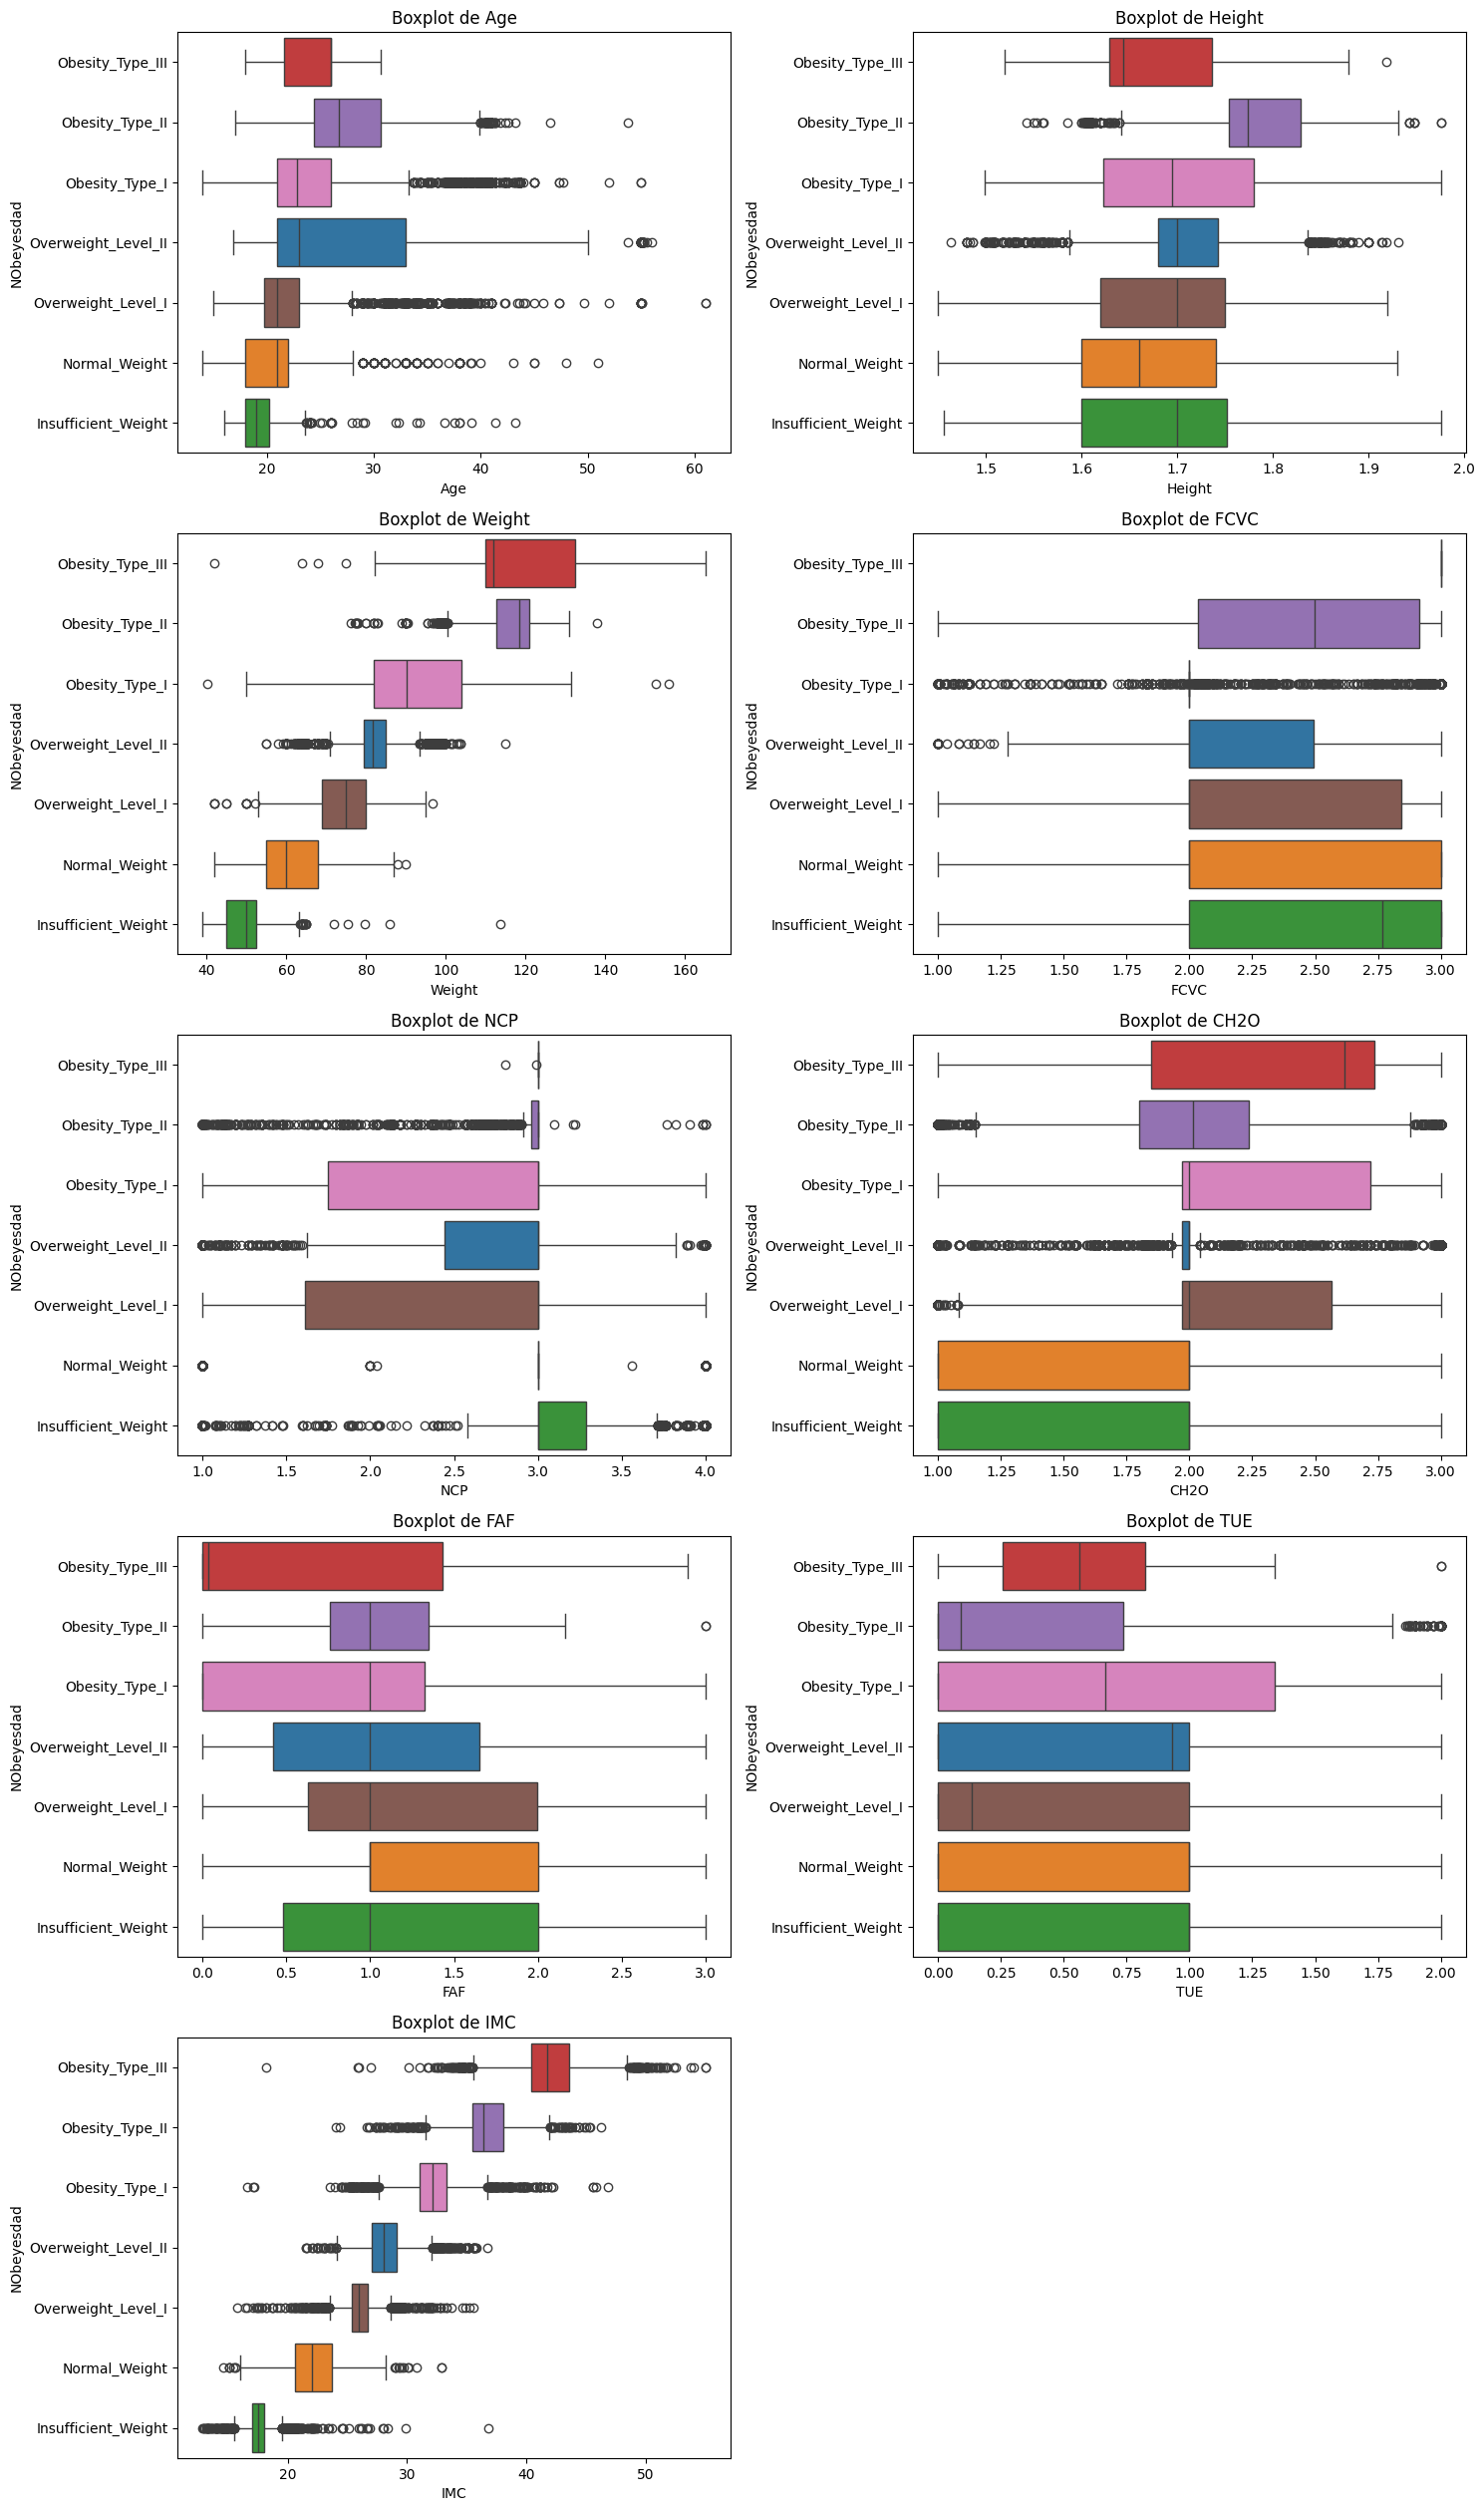

In [9]:
def plot_variables_boxplot(df: pd.DataFrame):

    cols_to_plot = [col for col in df.columns if (col not in ('id', 'NObeyesdad') and df[col].dtype!='object')]
    num_variables = len(df.columns)
    num_columns = 2
    num_rows = math.ceil(num_variables / num_columns)
    
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size accordingly
    obesity_level_order = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I', 'Overweight_Level_II', 
                           'Overweight_Level_I', 'Normal_Weight', 'Insufficient_Weight']
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(num_rows, num_columns, i % num_columns + 1 + (i // num_columns) * num_columns)
        sns.boxplot(df, y='NObeyesdad', x=col, hue='NObeyesdad', order=obesity_level_order)
        plt.title(f'Boxplot de {col}')
        

    plt.tight_layout()
    plt.show()
plot_variables_boxplot(df_treino)

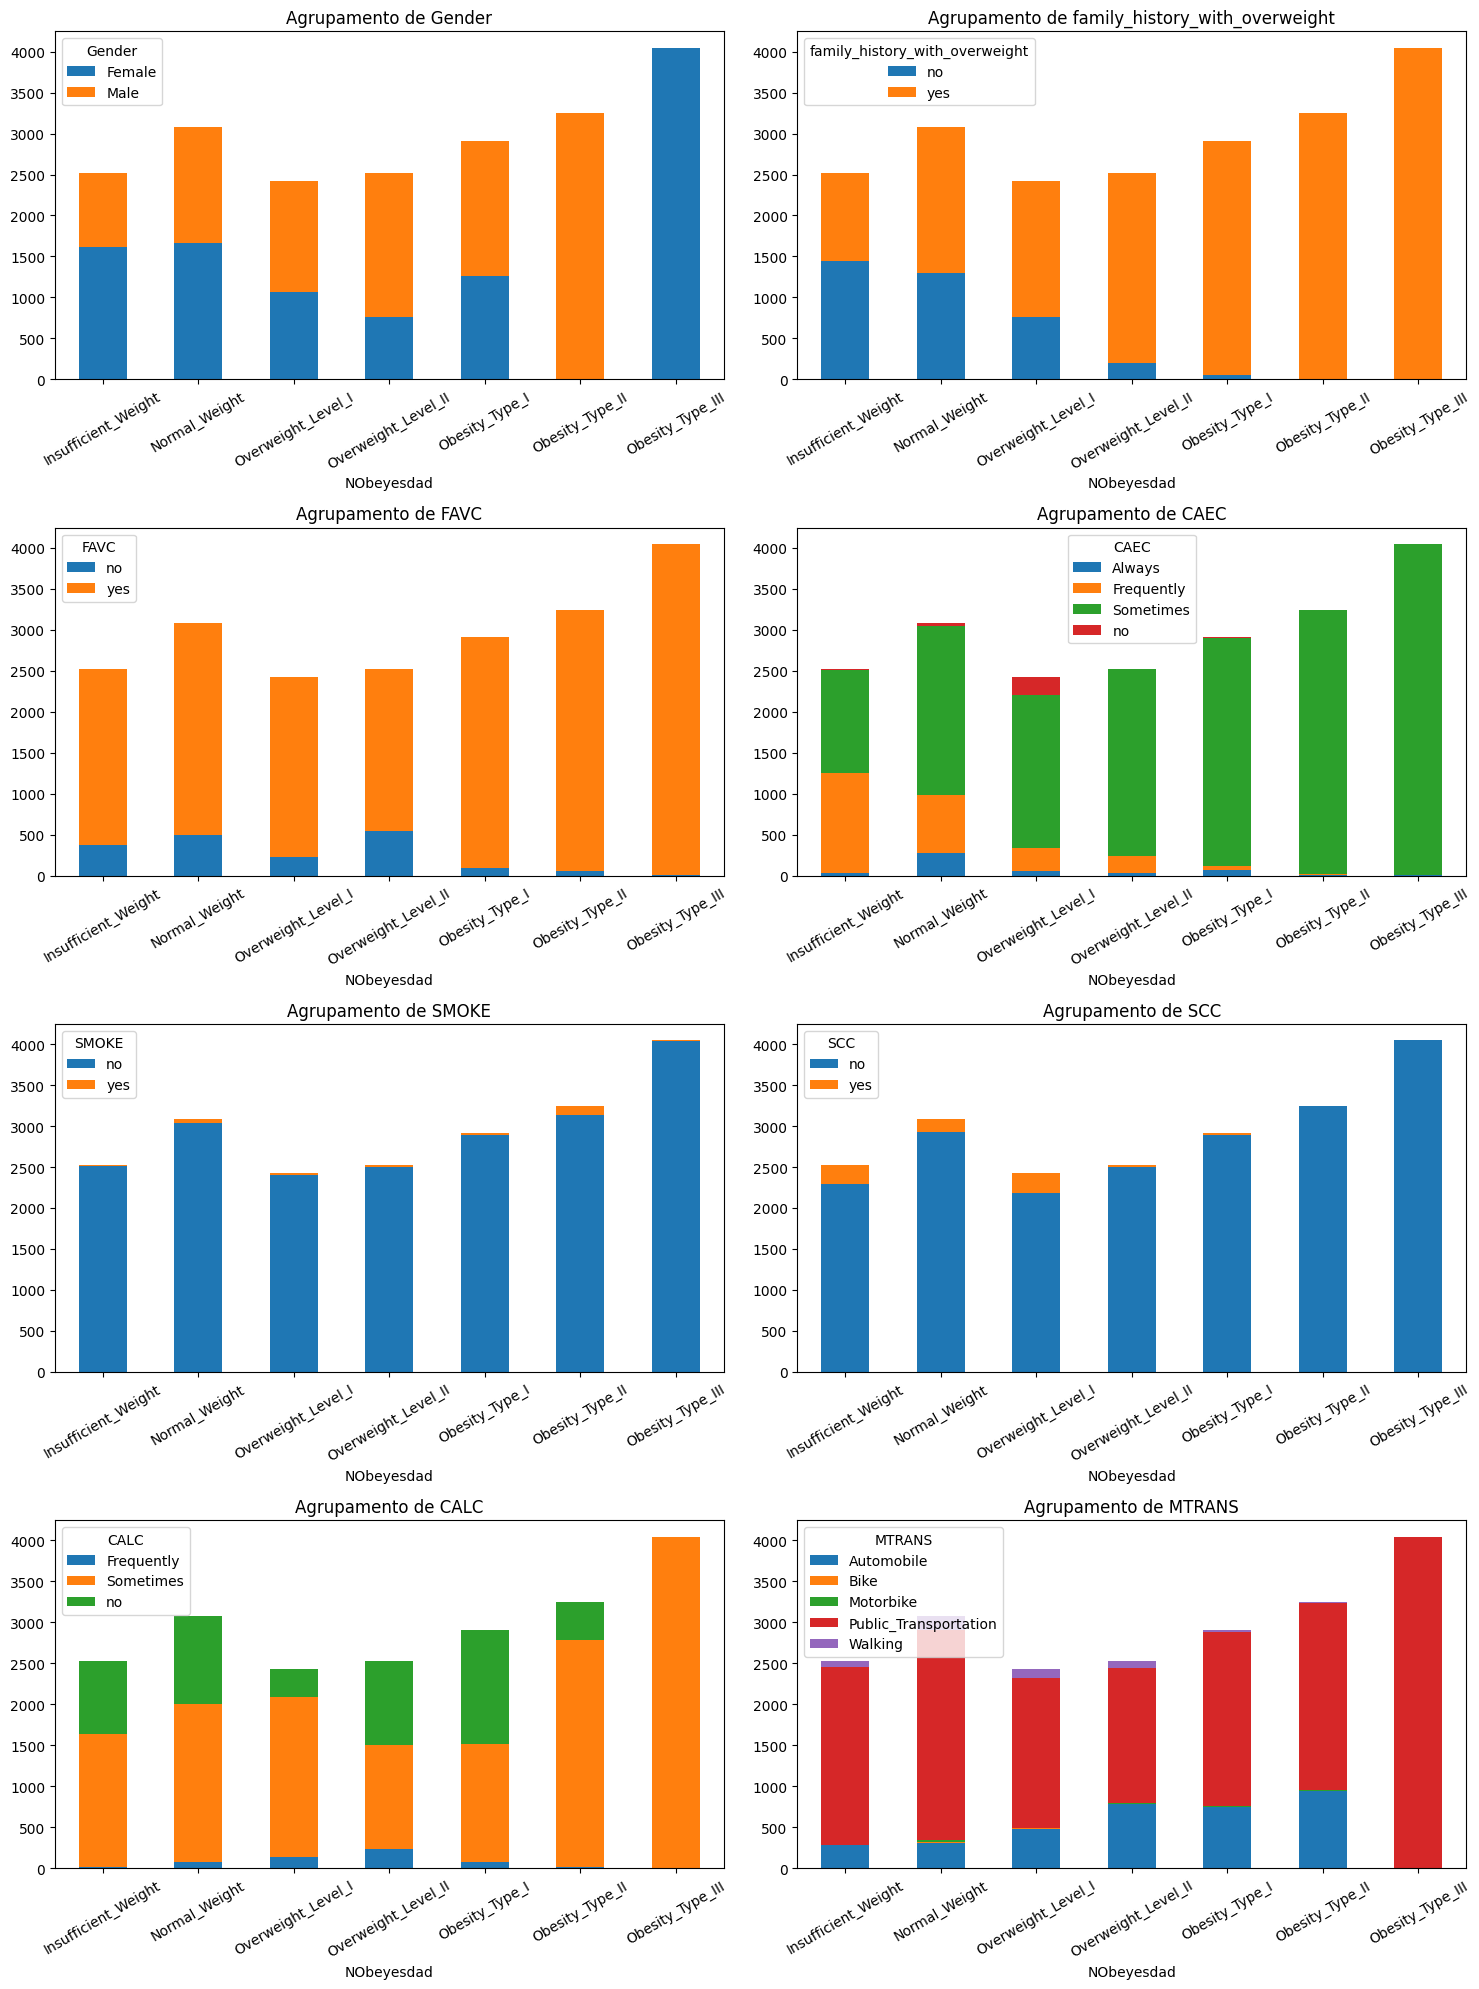

In [10]:
def plot_variables_grouped_by_obesity(df: pd.DataFrame):

    cols_to_plot = [col for col in df.columns if (col not in ('id', 'NObeyesdad') and df[col].dtype=='object')]
    num_variables = len(cols_to_plot)
    num_columns = 2
    num_rows = math.ceil(num_variables / num_columns)
    
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
    obesity_level_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                           'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
    
    for i, col in enumerate(cols_to_plot):
        col_data = df.groupby('NObeyesdad')[col].value_counts().unstack()
        col_data = col_data.reindex(obesity_level_order)
        col_data.plot(kind='bar', stacked=True, ax=axs[i//num_columns, i%num_columns])
        axs[i//num_columns, i%num_columns].set_title(f'Agrupamento de {col}')
        axs[i//num_columns, i%num_columns].tick_params(axis='x', rotation=30)
        

    plt.tight_layout()
    plt.show()
plot_variables_grouped_by_obesity(df_treino)

## Transformando os dados

In [11]:
df_without_output = df_treino.drop(['id', 'NObeyesdad'], axis=1)
df_with_output = df_treino['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(df_without_output, df_with_output,test_size=0.15,random_state=42,shuffle=True)

categorical_columns = list(df_without_output.select_dtypes(include=['object']))
numerical_columns = list(df_without_output.select_dtypes(exclude=['object']))

# Train transformer
X_train_categorical = X_train[categorical_columns]
X_train_numerical = X_train[numerical_columns]
encoder = OneHotEncoder()
scaler = StandardScaler()
encoder.fit(X_train_categorical)
onehotlabels = encoder.transform(X_train_categorical).toarray()
scaled = scaler.fit_transform(X_train_numerical)
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)
onehot_df = pd.DataFrame(onehotlabels, columns=encoded_column_names)
scaled_df = pd.DataFrame(scaled, columns=numerical_columns)
X_train_processed = pd.concat([onehot_df, scaled_df], axis=1)

# Test transformer
X_test_categorical = X_test[categorical_columns]
X_test_numerical = X_test[numerical_columns]
encoder = OneHotEncoder()
scaler = StandardScaler()
encoder.fit(X_test_categorical)
onehotlabels = encoder.transform(X_test_categorical).toarray()
scaled = scaler.fit_transform(X_test_numerical)
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)
onehot_df = pd.DataFrame(onehotlabels, columns=encoded_column_names)
scaled_df = pd.DataFrame(scaled, columns=numerical_columns)
X_test_processed = pd.concat([onehot_df, scaled_df], axis=1)


# Submission transformer
df_kaggle_submission_id = df_kaggle_submission['id']
df_kaggle_submission_without_id = df_kaggle_submission.drop(['id'], axis=1)


df_kaggle_submission_without_id_categorical = df_kaggle_submission_without_id[categorical_columns]
df_kaggle_submission_without_id_numerical = df_kaggle_submission_without_id[numerical_columns]
encoder = OneHotEncoder()
scaler = StandardScaler()
encoder.fit(df_kaggle_submission_without_id_categorical)
onehotlabels = encoder.transform(df_kaggle_submission_without_id_categorical).toarray()
scaled = scaler.fit_transform(df_kaggle_submission_without_id_numerical)
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)
onehot_df = pd.DataFrame(onehotlabels, columns=encoded_column_names)
scaled_df = pd.DataFrame(scaled, columns=numerical_columns)
df_kaggle_transformed = pd.concat([onehot_df, scaled_df], axis=1)

In [22]:
X_train_processed.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.328252,1.481585,0.700252,0.521824,-2.502656,-0.047371,-0.419105,-1.025261,0.182833
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.108039,0.082022,1.262396,1.043312,0.338479,0.834541,-0.012326,-0.074567,1.359772
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.502753,0.911944,0.760160,-0.833629,-2.502656,1.599126,0.018788,0.631122,0.459196
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.719748,-0.118417,-1.326653,-0.833629,0.338479,-0.047371,2.399702,0.631122,-1.406627
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.097560,1.070207,0.651341,-0.833629,0.338479,-0.047371,-1.171669,-0.795988,0.289233


In [21]:
X_test_processed.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.433395,-0.579949,0.923806,1.016055,0.337748,-1.204930,-1.089605,0.180802,1.315879
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-1.031077,0.577714,-0.281050,-0.851401,0.337748,-0.053831,0.038945,0.667889,-0.475562
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.049825,0.157234,-0.102877,0.792261,0.337748,1.324624,1.246291,-1.015078,-0.149377
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.166002,-0.333207,0.926348,-1.650605,0.337748,-0.048034,-1.168401,-0.826336,1.193399
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-1.214136,-1.029800,-1.412973,-0.851401,0.337748,-0.053831,-1.168401,2.355243,-1.289862


## PCA e dimensionalidade

Text(0.5, 1.0, 'Number of components x Exp Variance Ratio')

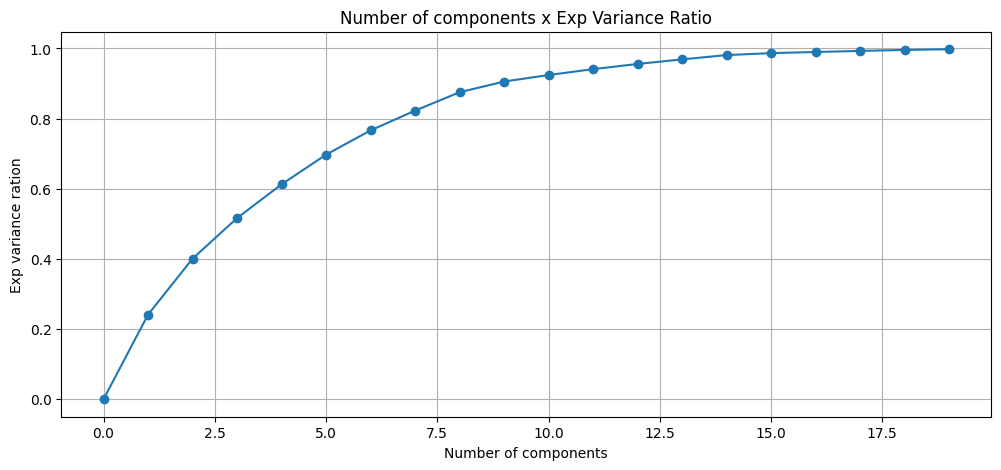

In [15]:
var_ratio = []
nums = [i for i in range(20)]
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(X_train_processed)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('Number of components')
plt.ylabel('Exp variance ration')
plt.title('Number of components x Exp Variance Ratio')

In [16]:
PCA_COMPONENTS = 15
pca_transf = PCA(n_components=PCA_COMPONENTS)
X_train_processed_pca = pca_transf.fit_transform(X_train_processed)
X_test_processed_pca = pca_transf.fit_transform(X_test_processed)
print(f'Variância para o PCA escolhido: {np.sum(pca_transf.explained_variance_ratio_)}')

Variância para o PCA escolhido: 0.986123223684392


## Treinamento dos modelos

In [17]:
result_dict_train = {}
result_dict_test = {}

models = {
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42)
}

datasets = {
    'Processed': X_train_processed,
    'Processed with PCA': X_train_processed_pca
}

all_scores = {model_name: {dataset_name: [] for dataset_name in datasets.keys()} for model_name in models.keys()}

for model_name, model in models.items():
    for dataset_name, dataset in datasets.items():
        scores = cross_val_score(model, dataset, y_train, cv=5)
        all_scores[model_name][dataset_name] = scores

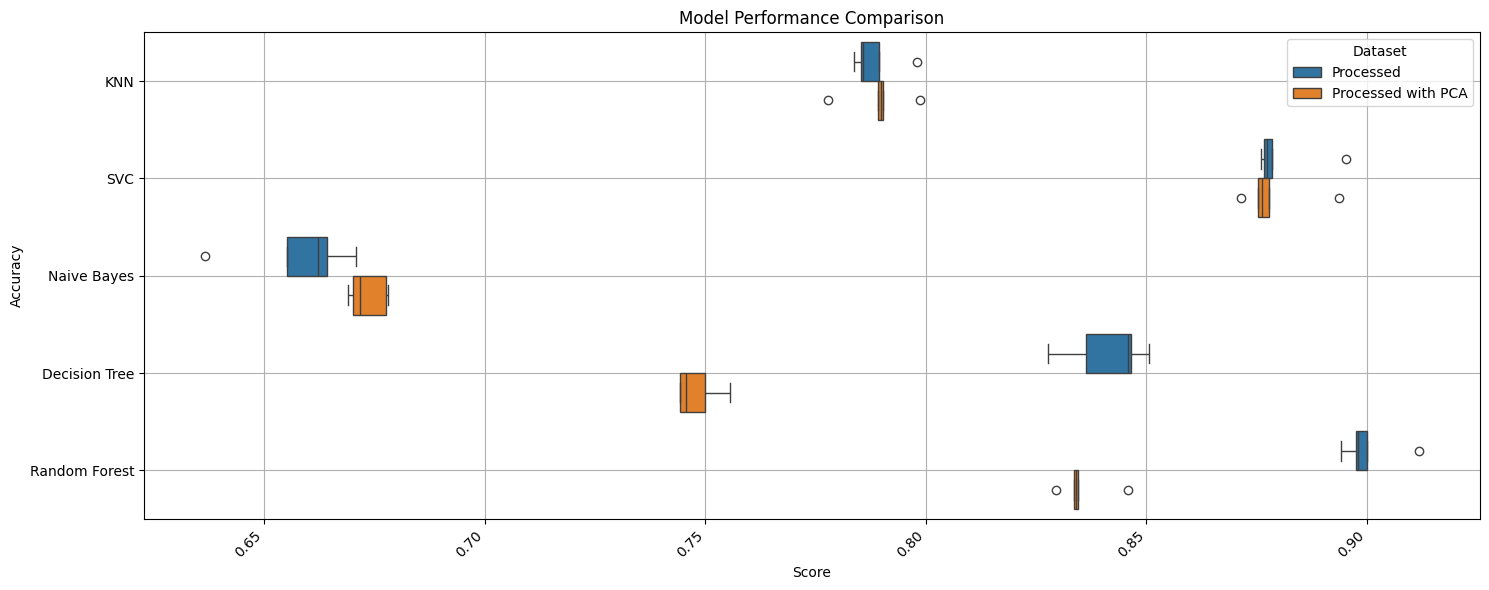

In [18]:
df_scores = pd.DataFrame([(model_name, dataset_name, score) 
                   for model_name, scores_dict in all_scores.items() 
                   for dataset_name, scores in scores_dict.items() 
                   for score in scores],
                  columns=['Model', 'Dataset', 'Score'])

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_scores, y='Model', x='Score', hue='Dataset', orient='h')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Resultado
A partir do boxplot, podemos observar que o resultado de maior acurácia foi o modelo de Random Forest sem utilizar PCA.

## Matriz de confusão

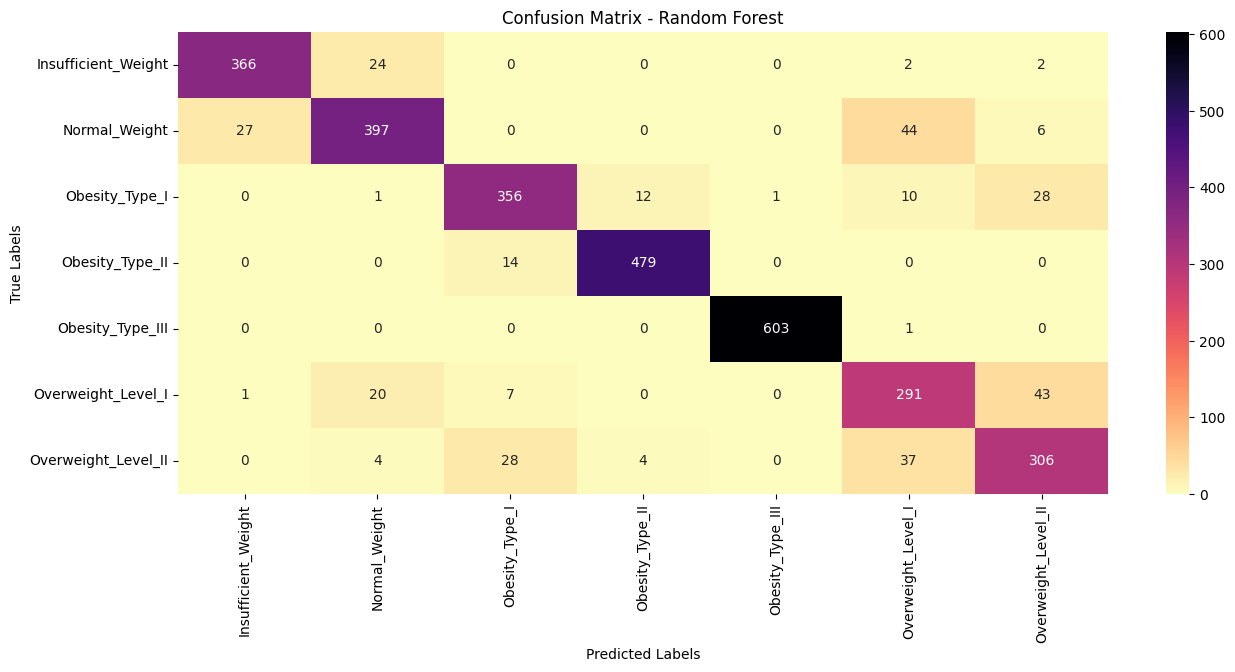

In [19]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_processed, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test_processed)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão
plt.figure(figsize=(15, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', cbar=True, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Observando a matriz de confusão, podemos ver que as maior dificuldade foi distinguir entre níveis de sobrepeso parecido (Ex: Level I e II).

In [23]:
predictions = pd.Series(rf_classifier.predict(df_kaggle_transformed))
predictions.name = 'NObeyesdad'
sub_df = pd.concat([df_kaggle_submission_id, predictions], axis=1)
sub_df.to_csv('./data/best_accuracy_result.csv', index=False)